# Real Estate - Price Predictor

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn

In [2]:
housing =pd.read_csv("Housing.csv")

In [3]:
housing.head()


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing['bedrooms'].value_counts()


bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [6]:
housing.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [7]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [8]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Plots

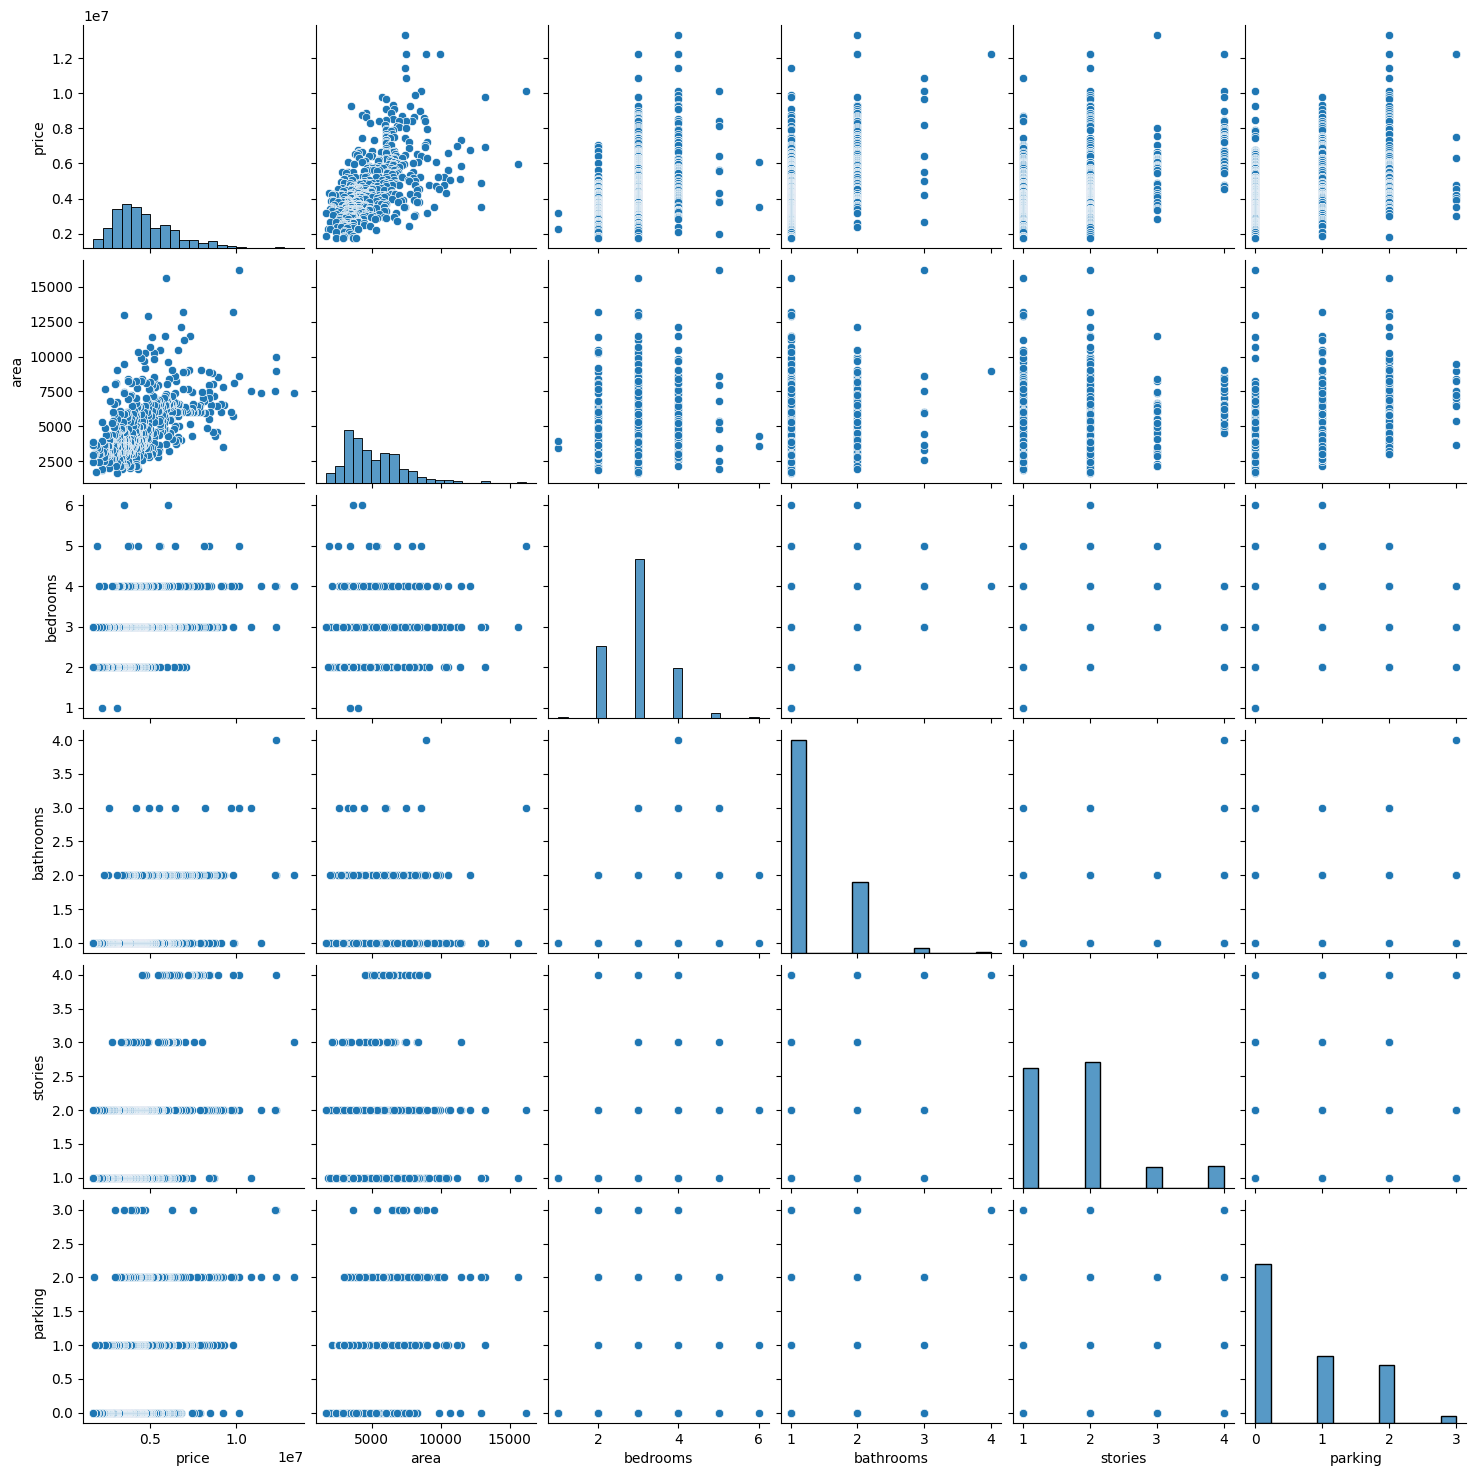

In [9]:
sns.pairplot(housing)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

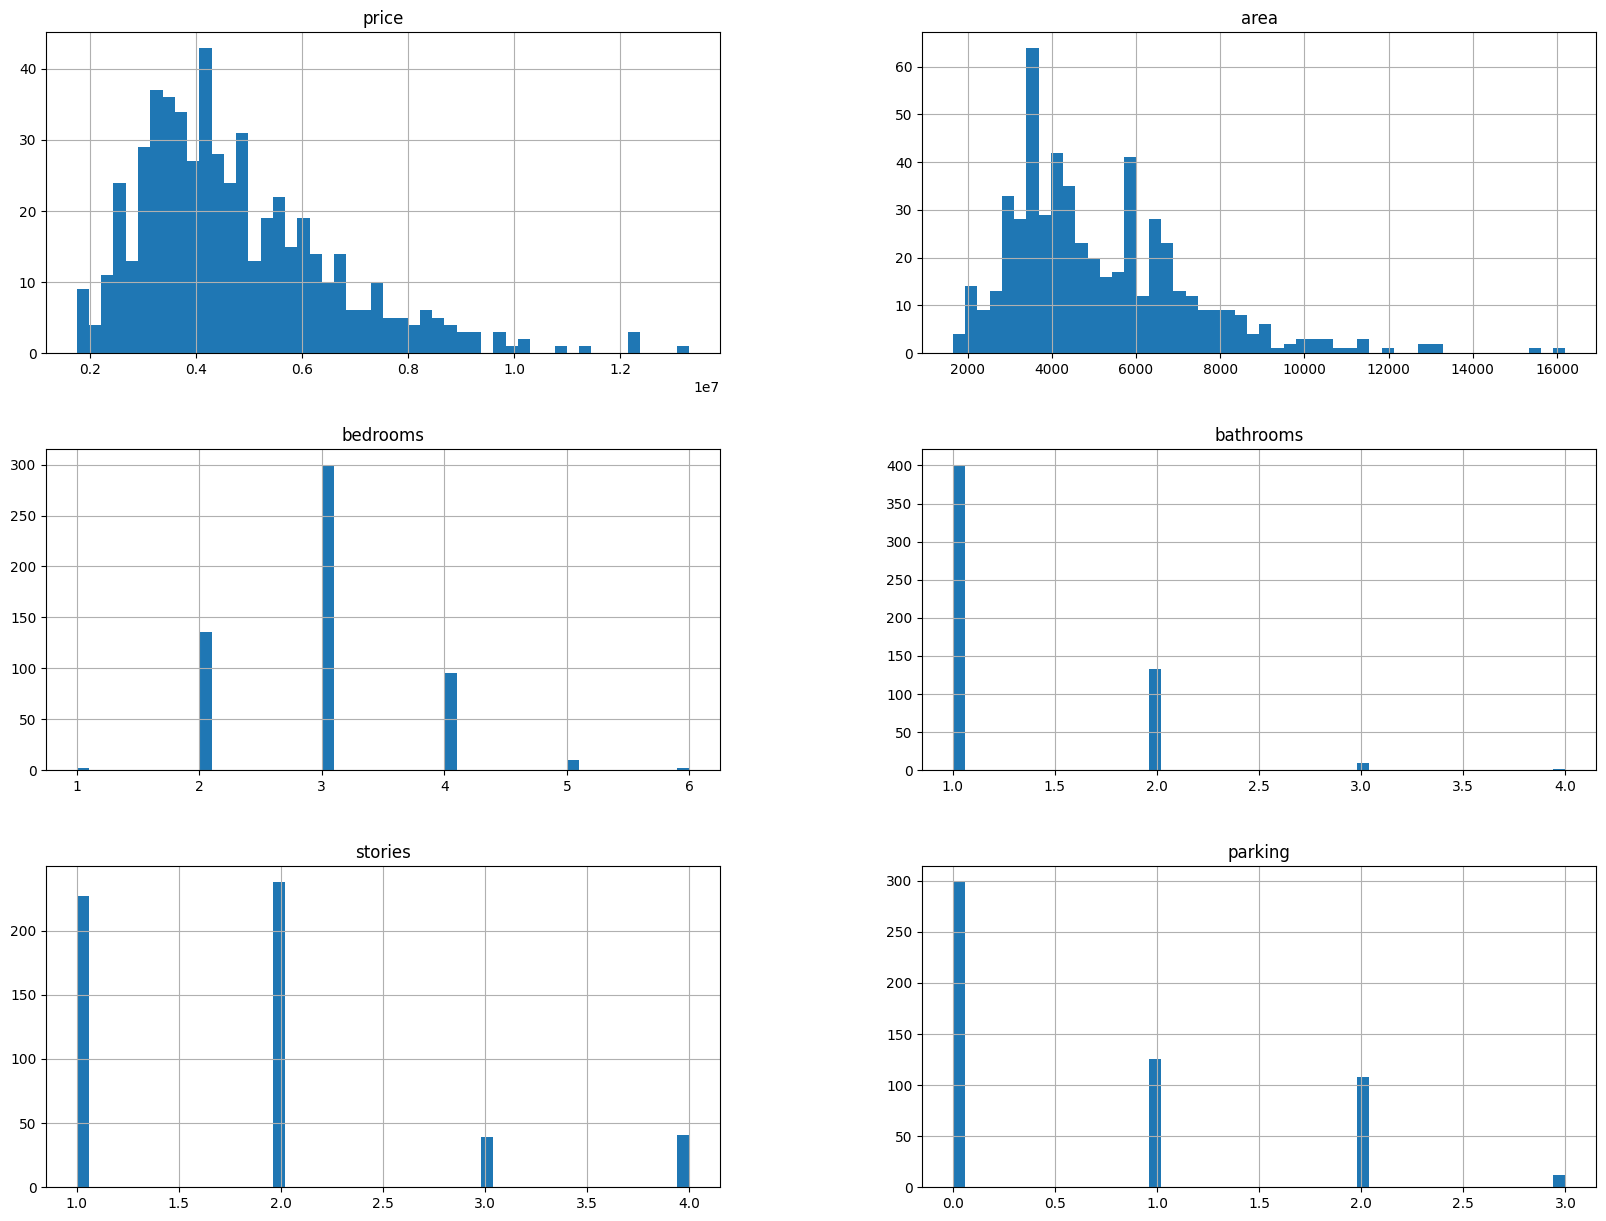

In [10]:
housing.hist(bins=50,figsize=(20,15
))

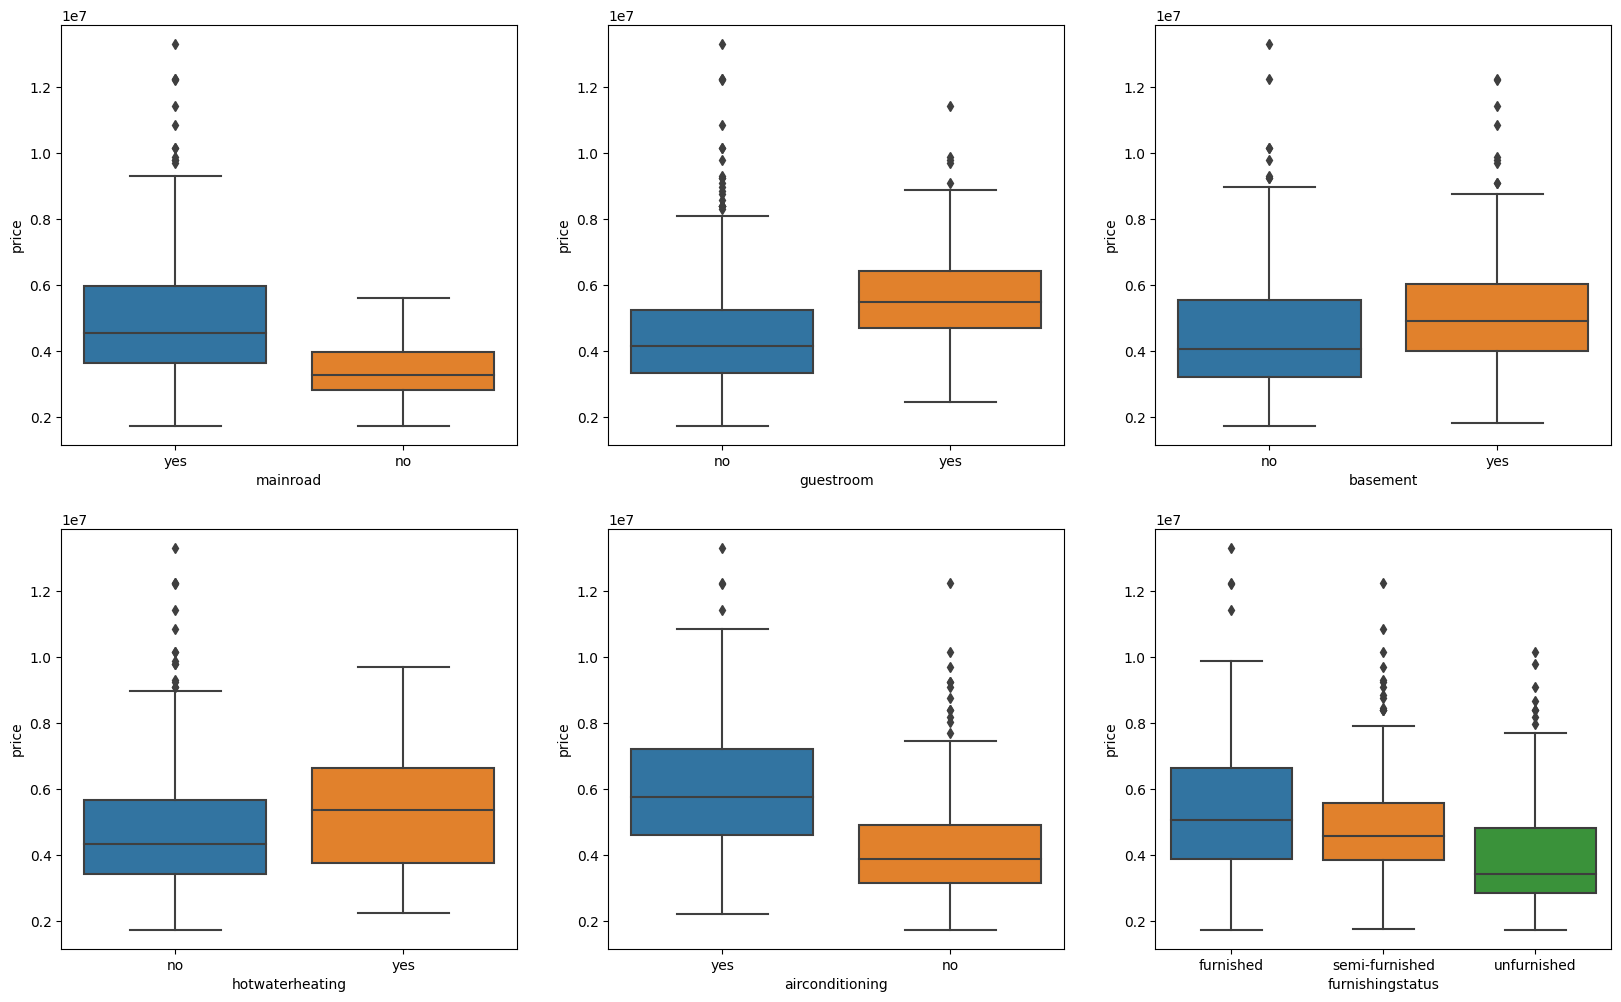

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

# conversion for yes no

In [12]:

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [13]:
housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [14]:
housing.drop("furnishingstatus", axis=1, inplace=True)

# correlation

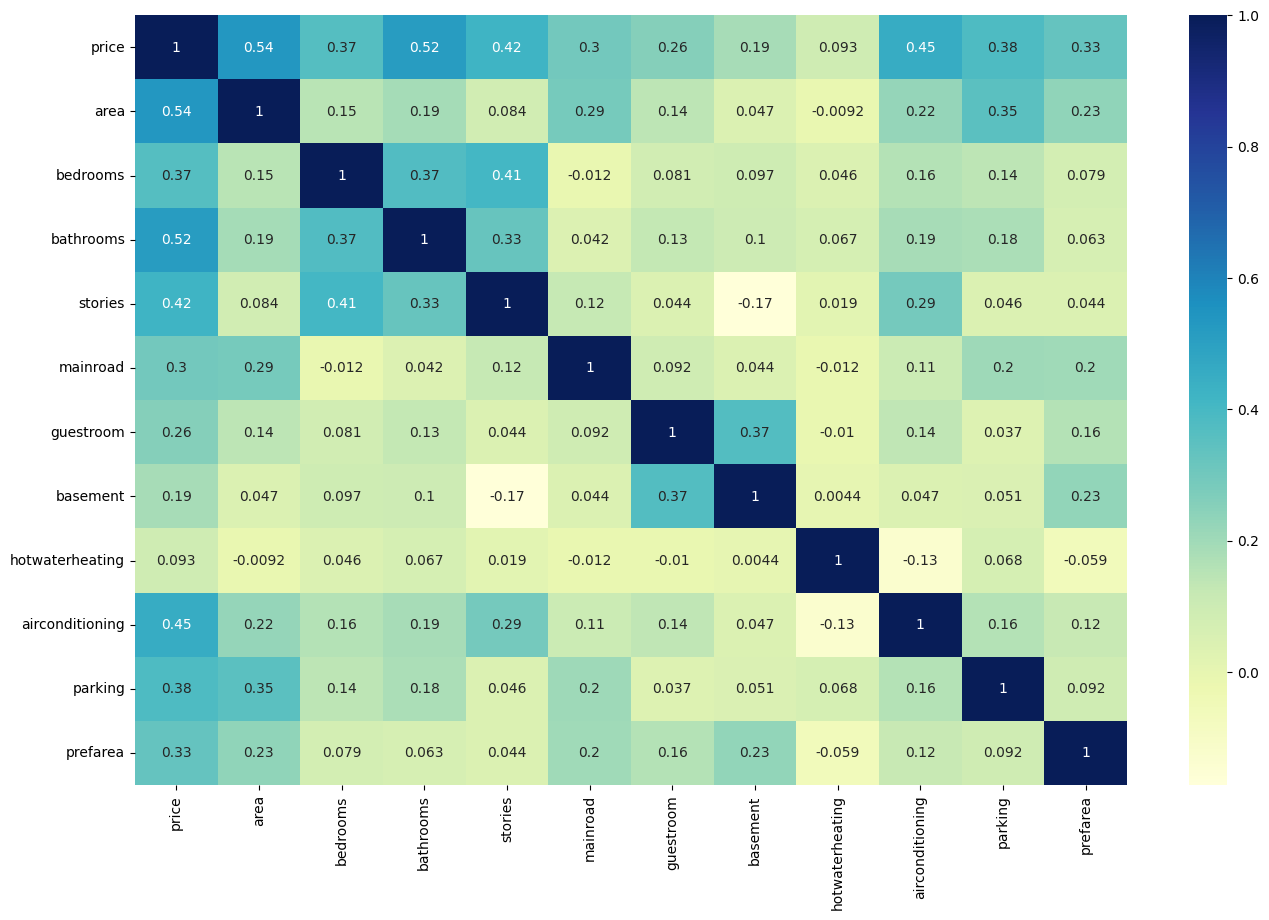

In [15]:
corrMatrix=housing.corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.show()

In [16]:
corrMatrix

price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area             0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms         0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms        0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories          0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad         0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom        0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement         0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating  0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning  0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking          0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea         0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   

                 guestroom  basement  hotwaterheating  airconditioning  \
price             0.255517  0.187057         0.093073         0.452954   
area              0.140297  0.047417        -0.009229         0.222393   
bedrooms          0.080549  0.097312         0.046049         0.160603   
bathrooms         0.126469  0.102106         0.067159         0.186915   
stories           0.043538 -0.172394         0.018847         0.293602   
mainroad          0.092337  0.044002        -0.011781         0.105423   
guestroom         1.000000  0.372066        -0.010308         0.138179   
basement          0.372066  1.000000         0.004385         0.047341   
hotwaterheating  -0.010308  0.004385         1.000000        -0.130023   
airconditioning   0.138179  0.047341        -0.130023         1.000000   
parking           0.037466  0.051497         0.067864         0.159173   
prefarea          0.160897  0.228083        -0.059411         0.117382   

                  parking  prefarea  
price            0.384394  0.329777  
area             0.352980  0.234779  
bedrooms         0.139270  0.079023  
bathrooms        0.177496  0.063472  
stories          0.045547  0.044425  
mainroad         0.204433  0.199876  
guestroom        0.037466  0.160897  
basement         0.051497  0.228083  
hotwaterheating  0.067864 -0.059411  
airconditioning  0.159173  0.117382  
parking          1.000000  0.091627  
prefarea         0.091627  1.000000

# Train-Test Splitting

/tmp/ipykernel_28608/3181592740.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['price'])


<Axes: xlabel='price', ylabel='Density'>

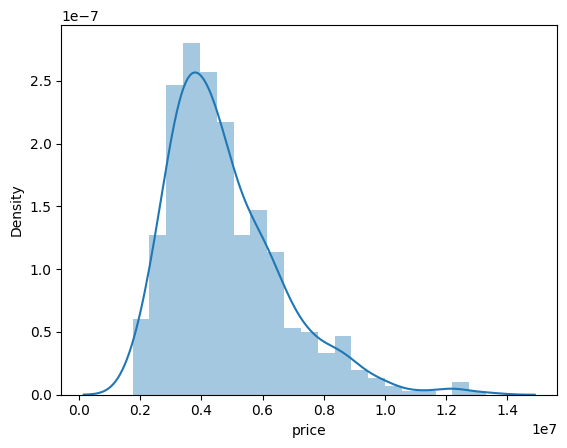

In [17]:
sns.distplot(housing['price'])


In [18]:
from sklearn.model_selection import train_test_split
X = housing[['area', 'bedrooms', 'bathrooms', 'stories','parking']]
y = housing['price']
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=101)

In [19]:
X_train

area  bedrooms  bathrooms  stories  parking
227  6000         2          1        1        1
319  3000         4          1        3        2
367  3630         2          1        1        0
515  3210         3          1        2        0
143  4800         5          2        3        0
..    ...       ...        ...      ...      ...
316  5900         4          2        2        1
393  7424         3          1        1        0
75   4260         4          2        2        0
337  2145         4          2        1        0
523  2787         4          2        2        0

[381 rows x 5 columns]

# Training Data using LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
print(lm.intercept_)


-209508.5502126692


In [24]:
lm.coef_

array([3.41375062e+02, 1.59955195e+05, 1.11176799e+06, 5.44811567e+05,
       4.20872034e+05])

In [25]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

coeff
area       3.413751e+02
bedrooms   1.599552e+05
bathrooms  1.111768e+06
stories    5.448116e+05
parking    4.208720e+05

In [26]:
predictions = lm.predict(X_test)

In [27]:
predictions

array([5228052.89731124, 5995585.4963848 , 5472300.94332271,
       5585024.92092052, 3900167.70698127, 3627475.48251981,
       7302216.87748202, 3957710.38355828, 3155886.81256311,
       5853389.13728531, 4192278.46875738, 6238585.42335084,
       3995669.46577145, 4839776.37033109, 5291779.9856768 ,
       5187322.97336454, 6385867.78414171, 6721389.64784292,
       3009586.61979335, 3669974.62346927, 4930075.88535383,
       3894791.08056339, 5369888.42463877, 4118564.48819218,
       3128576.80758073, 4572185.49566194, 3659756.40448811,
       3479828.71377941, 3557320.85291693, 4940870.56292414,
       7321483.58991797, 3655828.53696752, 5830253.67470596,
       3035017.00762882, 5098947.60128531, 3388512.93892394,
       3410702.31797213, 7328208.55637351, 3508162.84394863,
       2995931.61730216, 4203500.42839974, 6006450.38100056,
       4264458.31584669, 5574713.46200666, 3375838.64420672,
       3241230.57813306, 4526099.86225417, 4552683.69969913,
       6381403.11869947,

Text(0, 0.5, 'Predicted')

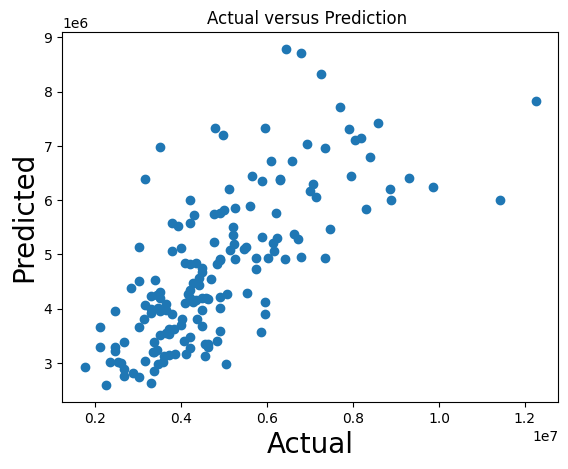

In [28]:
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)  

/tmp/ipykernel_28608/117164448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test, predictions),bins=70);


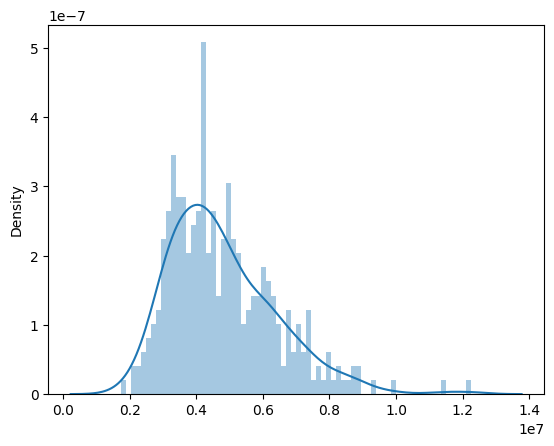

In [30]:
sns.distplot((y_test, predictions),bins=70);

In [31]:
sklearn.metrics.mean_absolute_error(y_test,predictions)

914597.7736590087

In [32]:
sklearn.metrics.mean_squared_error(y_test,predictions)

1605005935259.644

In [33]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test,predictions))

1266888.2883899605